#Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model


# Data Preprocessing:
##Load and preprocess the data (e.g., normalization, resizing).
##Visualize some images and their labels.

In [ ]:
# Load CIFAR-10 dataset
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

# Normalize pixel values to range [0,1]
x_train1 = x_train1.astype("float32") / 255.0
x_test1 = x_test1.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train1 = tf.keras.utils.to_categorical(y_train1, 10)
y_test1 = tf.keras.utils.to_categorical(y_test1, 10)

# Print dataset shapes
print(f"Training data shape: {x_train1.shape}, Training labels shape: {y_train1.shape}")
print(f"Testing data shape: {x_test1.shape}, Testing labels shape: {y_test1.shape}")


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 10)


#Visualize some images

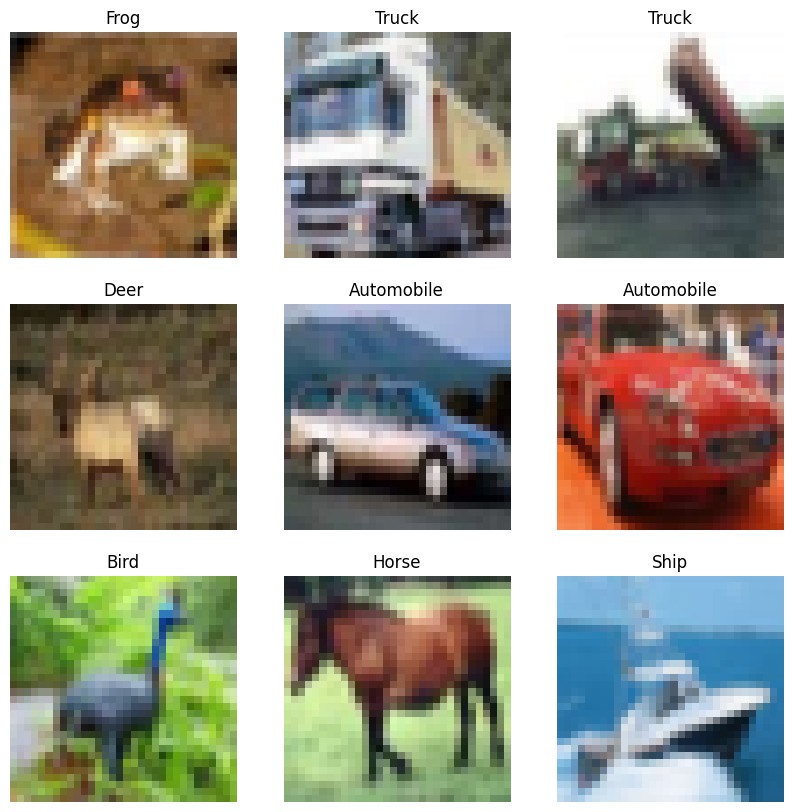

In [ ]:
#Visualize some images and their labels

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot some sample images
num_images = 9  # Number of images to display
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
    plt.imshow(x_train1[i])  # Show image
    plt.title(class_names[np.argmax(y_train1[i])])  # Get label name
    plt.axis("off")  # Hide axes

plt.show()

# Data augmentation

In [ ]:
# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate images randomly by 15 degrees
    width_shift_range=0.2,   # Shift width by 10%
    height_shift_range=0.2,  # Shift height by 10%
    horizontal_flip=True,    # Flip images horizontally
    zoom_range=0.1,          # Random zoom
    fill_mode='nearest'      # Fill missing pixels
)

#Split the dataset

In [ ]:
# Split the training set into training (80%) and validation (20%)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train1, y_train1, test_size=0.2, random_state=42)

Training set: (40000, 32, 32, 3), Training labels: (40000, 10)
Validation set: (10000, 32, 32, 3), Validation labels: (10000, 10)
Test set: (10000, 32, 32, 3), Test labels: (10000, 10)


#Design a CNN architecture suitable for image classification.
##CCN model 1

In [ ]:
cnn_model_1 = models.Sequential([

    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),


    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layers
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

cnn_model_1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,243,562 (4.74 MB)

 Trainable params: 1,242,090 (4.74 MB)

 Non-trainable params: 1,472 (5.75 KB)

#Compile and Train the CNN model using appropriate optimization techniques



In [92]:
# Fit the generator to the training data
datagen.fit(x_train1)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.01,
    restore_best_weights=True
)
optimizer = Adam(learning_rate=0.001)

cnn_model_1.compile(loss="categorical_crossentropy",
                    optimizer=optimizer,
                        metrics=['accuracy'])


history1=cnn_model_1.fit(
    datagen.flow(x_train1, y_train1, batch_size=64),
    validation_data=(x_test1, y_test1),
    epochs=100,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.6204 - loss: 1.0957 - val_accuracy: 0.5261 - val_loss: 1.4379 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6458 - loss: 1.0224 - val_accuracy: 0.6751 - val_loss: 0.9576 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6729 - loss: 0.9493 - val_accuracy: 0.6557 - val_loss: 1.1384 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6826 - loss: 0.9205 - val_accuracy: 0.7277 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6975 - loss: 0.8791 - val_accuracy: 0.7159 - val_loss: 0.8322 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7097 - loss: 0.8484 - val_accuracy: 0.7733 - val_loss: 0.6582 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7

#Calculate model '1' metrics: accuracy, precision, recall, and F1-score and test loss.

Test loss: 0.48545220494270325
Test accuracy: 0.8385999798774719
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


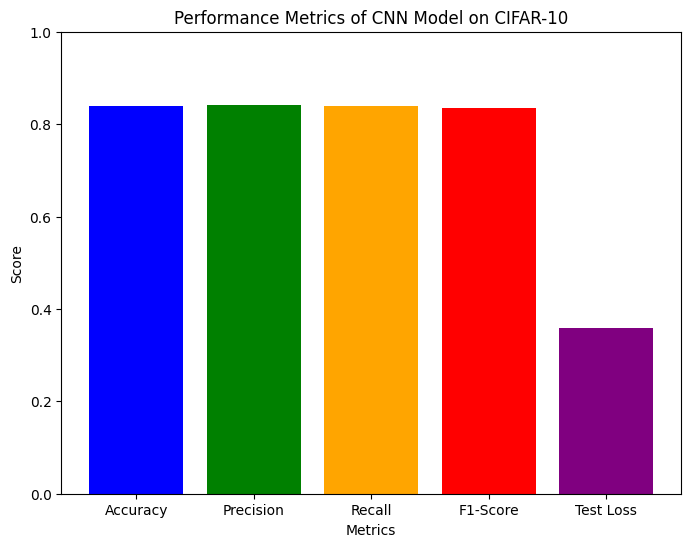

In [93]:
cnn_model_1_scores = cnn_model_1.evaluate(x_test1, y_test1, verbose=0)
print("Test loss:", cnn_model_1_scores[0])
print("Test accuracy:", cnn_model_1_scores[1])

y_pred1 = cnn_model_1.predict(x_test1)

y_pred_classes = np.argmax(y_pred1, axis=1)
y_test_classes = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)

precision = precision_score(y_test_classes, y_pred_classes, average='macro', zero_division=1)

recall = recall_score(y_test_classes, y_pred_classes, average='macro', zero_division=1)

f1 = f1_score(y_test_classes, y_pred_classes, average='macro', zero_division=1)

test_loss = history.history['val_loss'][-1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Test Loss']
values = [accuracy, precision, recall, f1, test_loss]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Performance Metrics of CNN Model on CIFAR-10')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

#Preprocessing data for CNN model 2

In [104]:
# Load CIFAR-10 dataset
(x_train2, y_train2), (x_test2, y_test2) = cifar10.load_data()

x_train2 = x_train2.astype("float32") / 255.0
x_test2 = x_test2.astype("float32") / 255.0

y_train2 = tf.keras.utils.to_categorical(y_train2, 10)
y_test2 = tf.keras.utils.to_categorical(y_test2, 10)

x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.2, random_state=42)


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 10)


#Design a CNN architecture suitable for image classification.

## CCN model 2

In [105]:
cnn_model_2 = models.Sequential([

    layers.Conv2D(64, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

cnn_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,287,754 (4.91 MB)

 Trainable params: 1,284,938 (4.90 MB)

 Non-trainable params: 2,816 (11.00 KB)

#Compile and Train the CNN model using appropriate optimization techniques



In [106]:
datagen.fit(x_train2)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.01,
    restore_best_weights=True
)
optimizer = Adam(learning_rate=0.001)

cnn_model_2.compile(loss="categorical_crossentropy",
                    optimizer=optimizer,
                        metrics=['accuracy'])

history2=cnn_model_2.fit(
    datagen.flow(x_train2, y_train2, batch_size=64),
    validation_data=(x_test2, y_test2),
    epochs=100,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.2645 - loss: 2.4809 - val_accuracy: 0.4176 - val_loss: 1.6191 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4718 - loss: 1.5034 - val_accuracy: 0.4283 - val_loss: 1.8825 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5729 - loss: 1.2092 - val_accuracy: 0.5900 - val_loss: 1.4073 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6307 - loss: 1.0465 - val_accuracy: 0.6329 - val_loss: 1.1075 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6695 - loss: 0.9468 - val_accuracy: 0.6313 - val_loss: 1.1127 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7022 - loss: 0.8645 - val_accuracy: 0.6837 - val_loss: 0.9475 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7215 - loss: 

#Calculate model '2' metrics: accuracy, precision, recall, and F1-score and test loss.

Test loss: 0.4061790108680725
Test accuracy: 0.8723000288009644
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


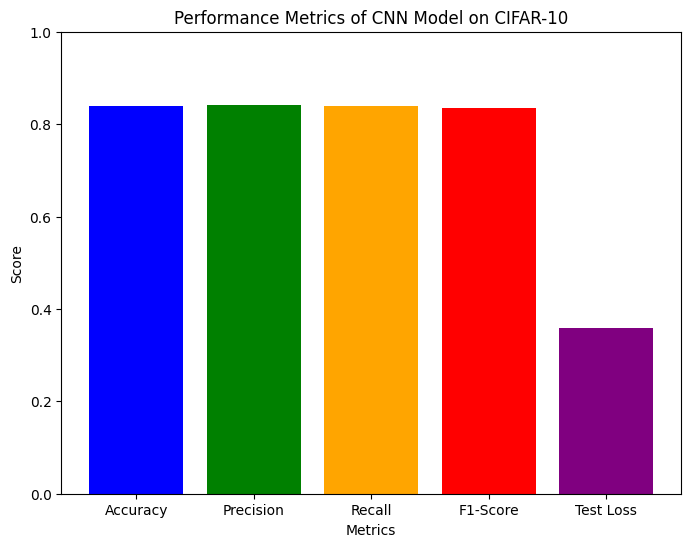

In [107]:
cnn_model_2_scores = cnn_model_2.evaluate(x_test2, y_test2, verbose=0)
print("Test loss:", cnn_model_2_scores[0])
print("Test accuracy:", cnn_model_2_scores[1])

y_pred2 = cnn_model_2.predict(x_test2)

y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_test_classes2 = np.argmax(y_test2, axis=1)

accuracy2 = accuracy_score(y_test_classes2, y_pred_classes2)

precision2 = precision_score(y_test_classes2, y_pred_classes2, average='macro', zero_division=1)

recall2 = recall_score(y_test_classes2, y_pred_classes2, average='macro', zero_division=1)

f1_2 = f1_score(y_test_classes2, y_pred_classes2, average='macro', zero_division=1)

test_loss_2 = history.history['val_loss'][-1]

metrics2 = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Test Loss']
values2 = [accuracy2, precision2, recall2, f1_2, test_loss_2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Performance Metrics of CNN Model on CIFAR-10')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

#Compare the two CNN models

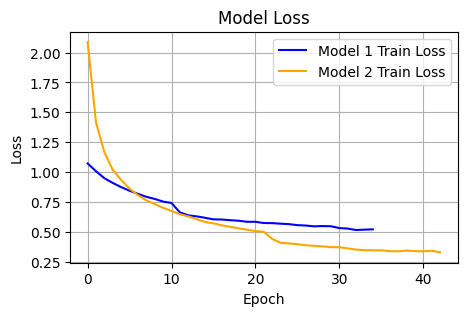

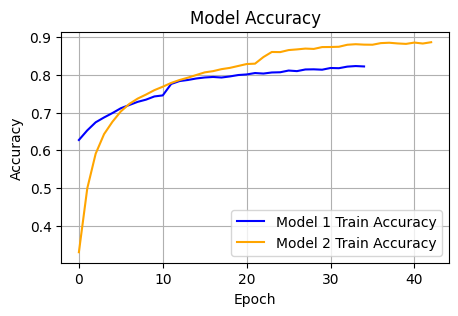

In [108]:
import matplotlib.pyplot as plt

# Plot Loss for Model 1 and Model 2
plt.figure(figsize=(5, 3))
plt.plot(history1.history['loss'], color='blue', linestyle='-', label='Model 1 Train Loss')
plt.plot(history2.history['loss'], color='orange', linestyle='-', label='Model 2 Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot Accuracy for Model 1 and Model 2
plt.figure(figsize=(5, 3))
plt.plot(history1.history['accuracy'], color='blue', linestyle='-', label='Model 1 Train Accuracy')
plt.plot(history2.history['accuracy'], color='orange', linestyle='-', label='Model 2 Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#Build the confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


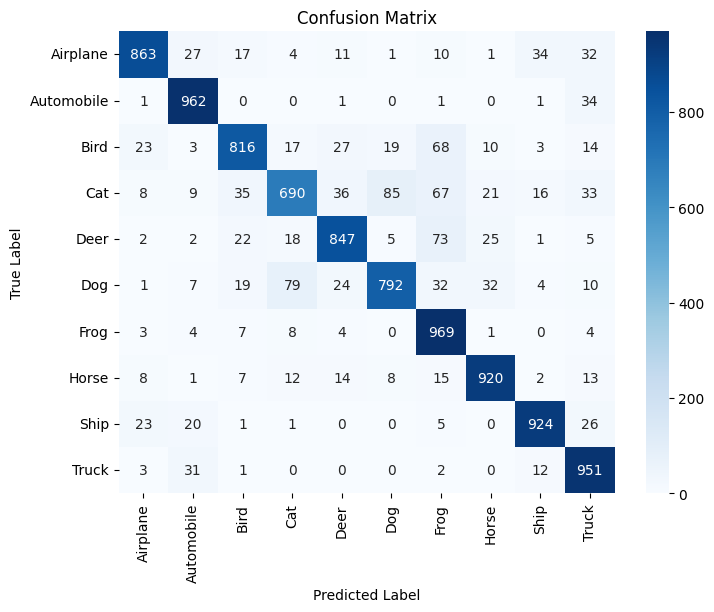

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = cnn_model_2.predict(x_test2)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test2, axis=1)

cm = confusion_matrix(y_true, y_pred)

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#Predict model '2' by chosing random image

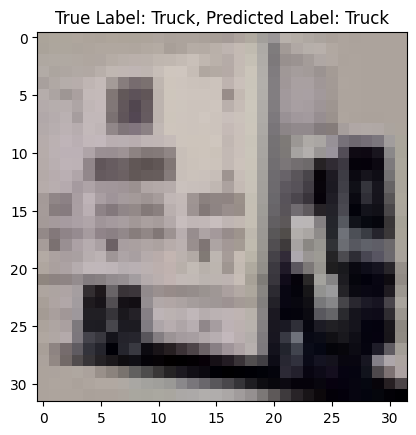

Prediction probabilities for each class: [8.1586342e-07 1.0906596e-03 4.7711751e-08 3.9030465e-06 1.0558972e-08
 2.0225517e-08 4.4082579e-08 7.8890849e-08 2.5955636e-05 9.9887842e-01]


In [130]:
import random

random_index = random.randint(0, len(x_test2) - 1)  # Random index from 0 to len(x_test)-1
image = x_test2[random_index]
true_label = y_test_classes2[random_index]
predicted_label = y_pred_classes2[random_index]

# Display the image
plt.imshow(image)
plt.title(f'True Label: {class_names[true_label]}, Predicted Label: {class_names[predicted_label]}')
plt.show()

# Step 4: Optionally, print the prediction probabilities
print("Prediction probabilities for each class:", y_pred2[random_index])

#Show model architecture diagram

In [ ]:
#plot_model(cnn_model_1, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


#Save the best model

In [131]:
cnn_model_2.save('cnn_model_2.h5')